# GEOG 497 - Spring 2021 - Cryosphere & Climate Systems
### A4: Greenland ice sheet SMB

### Code to create plots of SMB variables from RACMO2.3p2 over the Greenland ice sheet

Input data: Annual sums of SMB and SMB components at 1 km spatial resolution
* Reference: https://advances.sciencemag.org/content/5/9/eaaw0123
        
You will need to specify:
* Start and end years over which the mean of a variable of interest will be calculated
* Variable & input file names
* Plot titles, min/max values, and contour interval

Output:
* Plot of the RACMO2.3p2 variable averaged over the given time period. 

### Run the following code block first:

In [7]:
# import python packages that allow for data reading, analysis, and plotting
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfe
import pandas as pd

# where are the data located?
dataFolder = '/gpfs/group/ljt5282/default/ClimateModels/RACMO2.3p2-d055/yearly/'

# load one data file to grab its geographic coordinates for plotting
ds = xr.open_dataset(dataFolder + 'snowmelt.1958-2017.BN_RACMO2.3p2_FGRN055_GrIS.MM_yearsum.nc', decode_times=False)
lat = ds.lat
lon = ds.lon

**These are the available yearly (sum or mean) RACMO2.3p2 data to plot**

In the code block below that does the plotting, you will need to specify the filename and variable name for one of these fields. 

| Variable type   | Units  | Filename | Variable name | 
|-----------------|--------|----------|---------------|
| Precipitation (solid + liquid) | mm w.e. | precip.1958-2017.BN_RACMO2.3p2_FGRN055_GrIS.MM_yearsum.nc | precipcorr |
| Refreeze | mm w.e. | refreeze.1958-2017.BN_RACMO2.3p2_FGRN055_GrIS.MM_yearsum.nc | refreezecorr |
| Runoff | mm w.e. | runoff.1958-2017.BN_RACMO2.3p2_FGRN055_GrIS.MM_yearsum.nc  | runoffcorr |
| SMB | mm w.e. | smb_rec.1958-2017.BN_RACMO2.3p2_FGRN055_GrIS.MM.nc_fix_yearsum.nc  | SMB_rec  |
| Snowfall | mm w.e. | snowfall.1958-2017.BN_RACMO2.3p2_FGRN055_GrIS.MM_yearsum.nc | snowfallcorr |
| Snowmelt | mm w.e. | snowmelt.1958-2017.BN_RACMO2.3p2_FGRN055_GrIS.MM_yearsum.nc | snowmeltcorr |
| Sublimation | mm w.e. | subl.1958-2017.BN_RACMO2.3p2_FGRN055_GrIS.MM_yearsum.nc | sublcorr |
| 2-m air temperature | K | t2m.1958-2017.BN_RACMO2.3p2_FGRN055_GrIS.MM_yearmean.nc | t2mcorr |

Advice:
* For most variables, you are investigating annual sums of the variable. This will give a hint on the order of magnitude you should set for the min and max values. To get it just right will take a bit of trial and error (try your plot multiple times to get it right).
* Some variables can be positive or negative. Thus, setting minimum and maximum plot values so that zero is in the middle is ideal, and use a diverging color map.
* If you are plotting t2m, it may be useful to subtract 273.15 to the variable to convert from K to C (thus allowing you to easily see where the 0°C contour is!). You can do this by adding `data = data-273.15` after the data variable is defined in the code. 

### Edit the following code block to your liking, then you can copy/paste it to create additional plots.

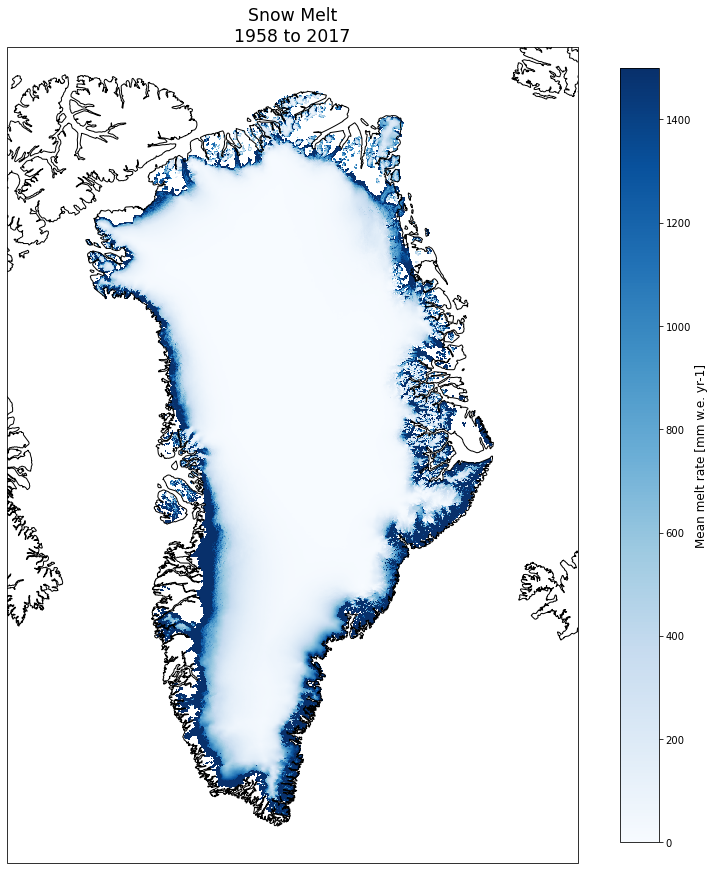

In [17]:
# [-------- EDIT THIS SECTION --------]
# Set the appropriate data file name and variable name using the above reference
data_file_name = 'snowmelt.1958-2017.BN_RACMO2.3p2_FGRN055_GrIS.MM_yearsum.nc'
variable_name = 'snowmeltcorr'

# set the plot and colorbar titles
plot_title = 'Snow Melt'
colorbar_label = 'Mean melt rate [mm w.e. yr-1]'

# define the time perid of interest
startyear = '1958'
endyear = '2017'

# set the min and max values of your plot, as well as the contour interval
# experiment with these to get a good looking plot
# these are numerical values not in quotes
min_plot_value = 0 
max_plot_value = 1500
contour_interval = 100

# choose a color map from https://matplotlib.org/stable/tutorials/colors/colormaps.html
# ** for diverging terms use a diverging color map and set the min/max values so that 0 is in the middle (i.e., neutral color) **
colormap_name = 'Blues'
reverse_colormap = False # True or False (must be capitalized and not in quotes)

# [-------- NO NEED TO EDIT BELOW--------]

# Read the netcdf file and load the variable from it 
# then define a new time dimension [needed here due to issues with default racmo time dimension]
ds = xr.open_dataset(dataFolder + data_file_name, decode_times=False)
ds['time'] = pd.date_range(start='1958-01-01', periods=ds.sizes['time'], freq='YS') # <- tells python data are yearly

# get the variable then do something to it..
# select interval of interest then take mean over the time dimension
var = ds[variable_name] # read variable
maskedvar = var.where(var != 0) #  mask areas were = 0 (don't plot it)
data = maskedvar.sel(time=slice(startyear, endyear)).mean('time') # <- calculates means between specified dates

# Move on to the plotting...
# Set up a plot: size, projection, and geographic extent. 
plot_crs = ccrs.NorthPolarStereo(central_longitude=-45)

fig = plt.figure(figsize=[15, 15])
ax = plt.subplot(1, 1, 1, projection=plot_crs)
ax.set_extent([-60, -26, 58, 85], ccrs.PlateCarree())

# This will set the minimum and maximum values on your plot: min, max, contour interval
clevs = np.arange(min_plot_value,max_plot_value+1,contour_interval)

# deal with colormap reversal, if set to True
if reverse_colormap:
    colormap_name = colormap_name + '_r' 
    
# Plot data 
result = ax.pcolormesh(lon, lat, data, vmin=min_plot_value, vmax=max_plot_value, transform=ccrs.epsg(3413), cmap=colormap_name)

# add coastlines 
ax.coastlines(resolution='10m')

# This sets the colorbar properties.
cb = plt.colorbar(result, orientation='vertical', shrink=0.95, pad=0.05)
cb.set_label(label=colorbar_label, size='large')

# This sets the title of the plot.
ax.set_title(plot_title + '\n' + startyear + ' to ' + endyear, size='xx-large')

# show the plot
plt.show()